In [3]:
cd /Users/Lin/Dropbox/Data\ science/Coursera\ machine\ learning/machine-learning-ex2/ex2    

/Users/Lin/Dropbox/Data science/Coursera machine learning/machine-learning-ex2/ex2


In [4]:
import pandas as pd
import scipy as sp
import seaborn as sns


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv("ex2data1.txt", header = None)

In [6]:
data.columns = ["exam1","exam2","label"]

In [16]:
data.head()

,exam1,exam2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [64]:
X = data.iloc[:,:2]


In [65]:
X.head()


,exam1,exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [66]:
y = data["label"]
y.head()


0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

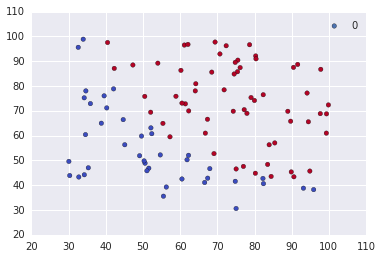

In [57]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm)
legend(list(y))
# This is a scatterplot made using matplotlib. I can't work out how to put a legend on this 

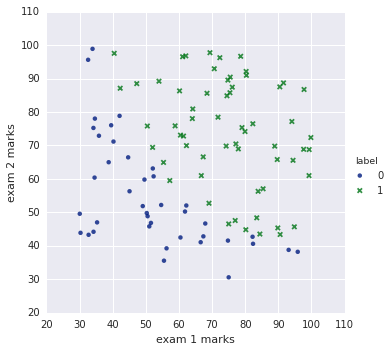

In [80]:
g = sns.lmplot("exam1", "exam2", hue="label", data=data, fit_reg=False, palette = "dark", markers = ["o","x"], legend = True)
plt.xlabel("exam 1 marks")
plt.ylabel("exam 2 marks")

In [7]:
# make a sigmoid (hypothesis) function that will generate logistic regression hypotheses when passed values of 'z'
#he hypothesis value is the probability that y=1 on input x.
# the function also needs to work for matrices
def sigmoid(z):
    g = np.array([z]).flatten()
    g =  1/(1+(np.e**-g)) # use vectorisation rather than a for loop to make this calculation more efficient
    return g

In [199]:
#check that sigmoid function is working - if it's working correctly sigmoid(0) = 0.5
sigmoid(0)


array([ 0.5])

In [9]:
#check that vectors can be passed to sigmoid
sigmoid(np.array([0,1,2,3000]))


array([ 0.5       ,  0.73105858,  0.88079708,  1.        ])

In [ ]:
sigmoid

In [67]:
#add a column of ones to the feature matrix X to account for theta 0
m = len(y)
X.insert(0, "theta zero",value =pd.Series(np.ones([m])))
X.head()


,theta zero,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [203]:
#initiate values for the vector theta 
initial_theta = np.zeros([3, 1])
hypothesis = sigmoid(X.dot(theta).T)
hypothesis


array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [121]:
initial_theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [18]:
hypothesis


array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [71]:
#define a function that computes the cost function for logistic regression
# so here we interpret  the cost as 'how expensive was our mistake?'. 
# e.g. If our hypothesis predicts with certainty that y=1
# but y actually turns out to be 0, this is a very costly mistake. 

def costJ(theta, X, y):
    m = len(y)
    hypothesis = sigmoid(X.dot(theta).T)
    error = hypothesis-y
    
    #this is the cost function for linear regression
    J = -np.sum(y*np.log(hypothesis)+(1-y)*log(1-hypothesis))/m
    
    return J

def gradient(theta,X,y):
    #this returns a vector, which is the gradient of the cost function (partial derivatives of the cost function)
    m = len(y)
    hypothesis = sigmoid(X.dot(theta).T)
    error = hypothesis-y
    
    gradient = []
    for i in range(len(X.columns)):
        gradient.append(np.sum(error*(X.iloc[:,i]))/m)
    return gradient


In [69]:
costJ(initial_theta,X,y)

0.6931471805599458

In [72]:
gradient(initial_theta,X,y)

[-0.1, -12.009216589291148, -11.262842205513591]

In [187]:
#optimise values of theta using scipy's minimize function
Result = sp.optimize.minimize(fun = costJ, x0 = initial_theta, args = (X,y), method = 'TNC', jac=gradient)
Result.x


array([-25.87336646,   0.21193525,   0.20722437])

In [215]:
#Test cost function using minimum values of theta
costJ(Result.x,X,y)

0.20357130532247558

(30, 100)

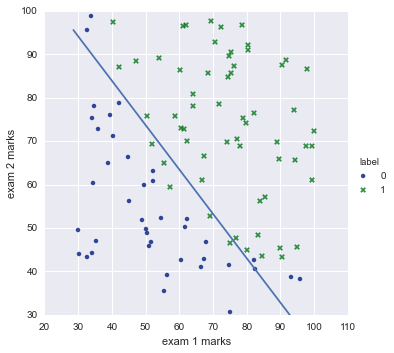

In [104]:
g = sns.lmplot("exam1", "exam2", hue="label", data=data, fit_reg=False, palette = "dark", markers = ["o","x"], legend = True)
plt.xlabel("exam 1 marks")
plt.ylabel("exam 2 marks")
plot_x = np.array([min(X.iloc[:,2])-2,  max(X.iloc[:,2])+2])
plot_y = (-1./Result.x[2])*(Result.x[1]*plot_x + Result.x[0])
plt.plot(plot_x,plot_y)
plt.ylim(30,100)

In [241]:
a = np.array([1,45,85])
hypothesis = sigmoid(a.dot(Result.x))
hypothesis


array([ 0.78207366])

In [182]:
#define a function that we can use to predict whether a new student will get into university or not
def predict (theta,X):
    m = len(X)
    hypothesis = sigmoid(X.dot(Result.x).T)
    p = []
    for student in hypothesis:
        if student>=0.5:
            p.append(1)
        else:
            p.append(0)
    return p
    

In [249]:
def predict(theta, X):
    p_1 = sigmoid(X.dot(theta))
    return (p_1 >= 0.5).astype(int)

In [243]:
Lin=np.array([[1,80,0],[1,67,89]])

In [250]:
predict(Result.x,Lin)

array([0, 1])

In [251]:
# Predict the percentage accuracy of our predictor by feeding it the original dataset
g = predict(Result.x,X)
float(y[y==g].size)/float(len(y))*100 


89.0

In [176]:
np.array([1,0])

array([1, 0])

In [166]:
g = np.empty([1], int)

In [169]:
np.concatenate((g,np.array([0])),axis=0)

array([0, 0])

In [173]:
np.array([[0],[0]])

array([[0],
       [0]])

In [171]:
g

array([0])